# -------------------IBM Attrition Analysis--------------------

Employees are the most valuable resources for any organization. The cost associated with professional training, the developed loyalty over the years and the sensitivity of some organizational positions, all make it very essential to identify who might leave the organization. Many reasons can lead to employee attrition. In this project, fewl machine learning models are developed predict employee attrition. IBM attrition dataset is used in this work to train and evaluate machine learning models; namely Decision Tree, Random Forest Regressor, Logistic Regressor, Naive Baye’s, SVM and KNN models. The aim is to consider 20 factors responsible for attrition out of all the available factors and check the best performing model.


### Data set:

IBM HR Analytics Employee Attrition  & Performance dataset is used.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ibm_data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No     1233
Yes     237
Name: Attrition, dtype: int64


<AxesSubplot:ylabel='Attrition'>

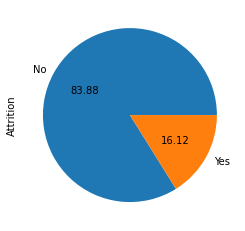

In [6]:
#checking the data unbalance

print(df["Attrition"].value_counts())
df["Attrition"].value_counts().plot.pie(autopct='%.2f')

In [7]:
df["_Attrition"] = df["Attrition"]
df.drop('Attrition', axis=1, inplace=True)

df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,_Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


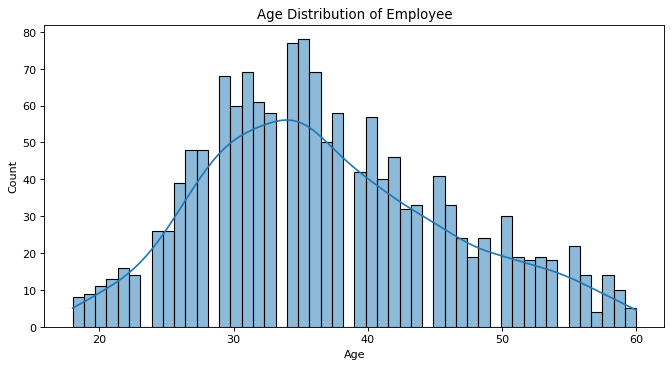

In [8]:
# histogram for age

plt.figure(figsize=(10,5), dpi=80)
sns.histplot(data=df, x='Age', bins=50, kde=True).set_title('Age Distribution of Employee');

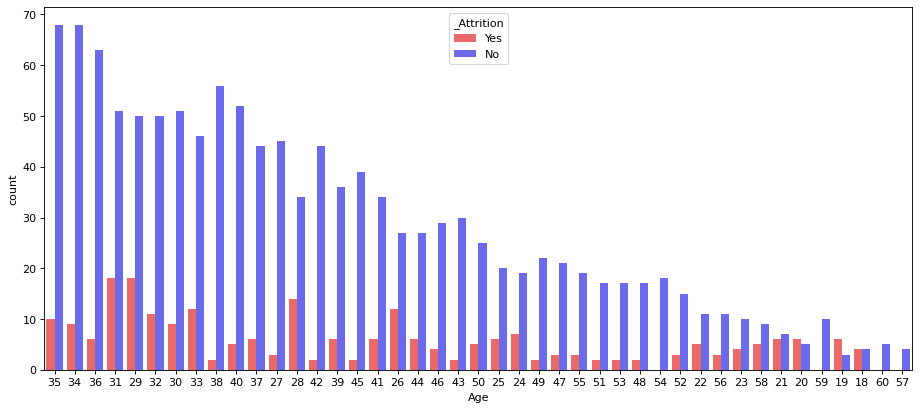

In [9]:
# attrition by age


plt.figure(figsize=(14,6), dpi=80)
sns.countplot(data=df, x='Age', hue='_Attrition', order = df['Age'].value_counts().index, palette='seismic_r').set_title
('Attrition by Age');

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [11]:
df.shape

(1470, 35)

In [12]:
# converting string variables into categorical numbers.

for i in df.columns:
    if df[i].dtype =="object":
        df[i]=LabelEncoder().fit_transform(df[i])
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,_Attrition
0,41,2,1102,2,1,2,1,1,1,2,...,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,...,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,...,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,...,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,...,80,1,6,3,3,2,2,2,2,0


In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
#Normalization

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.54761905, 1.        , 0.71581961, ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.5       , 0.12670007, ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 1.        , 0.90980673, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 1.        , 0.03793844, ..., 0.11111111, 0.        ,
        0.17647059],
       [0.73809524, 0.5       , 0.65926986, ..., 0.33333333, 0.        ,
        0.47058824],
       [0.38095238, 1.        , 0.37652112, ..., 0.16666667, 0.06666667,
        0.11764706]])

In [15]:
x_scaled.shape

(1470, 34)

PCA-Principal Component analysis is applied to retain the 20 factors out of all the factors without loss of information.

In [16]:
pca = PCA(0.90)# thershold limit of 90% is choosen
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled) 
print("variance ratio: ",pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.09251334 0.085561   0.0763181  0.0672013  0.06565084 0.05277758
 0.04988732 0.04912229 0.04720627 0.04099221 0.035805   0.03343204
 0.031974   0.03052906 0.02926687 0.02845271 0.0258437  0.02346006
 0.020533   0.02009828]
sum:  0.9066249638673096


In [17]:
x_pca.shape

(1470, 20)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
             x_pca, y, test_size = 0.2, random_state=42)

In [19]:
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    conf_mat = confusion_matrix(y_test, pred_test)
    conf_mat = pd.DataFrame(conf_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(8,8))
    sns.set(font_scale=1.5) 
    sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
conf_matrix

<function __main__.conf_matrix(y_test, pred_test)>

### KNN

In [20]:

model = KNeighborsClassifier(n_neighbors=10)
 
model.fit(x_train, y_train.values.ravel())
y_pred= model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
print("Prediction Accuracy: ",model.score(x_test, y_test))

Prediction Accuracy:  0.8707482993197279


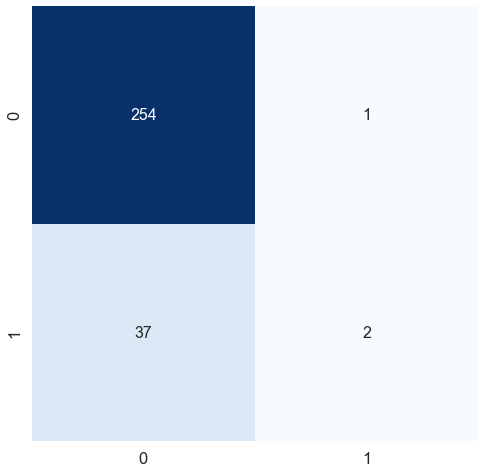

In [22]:
conf_matrix(y_test,y_pred)

### SVM classifier

In [23]:
from sklearn import svm
model = svm.SVC()
model = model.fit(x_train, y_train.values.ravel())
y_pred= model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
print("Prediction Accuracy: ",model.score(x_test, y_test))

Prediction Accuracy:  0.8809523809523809


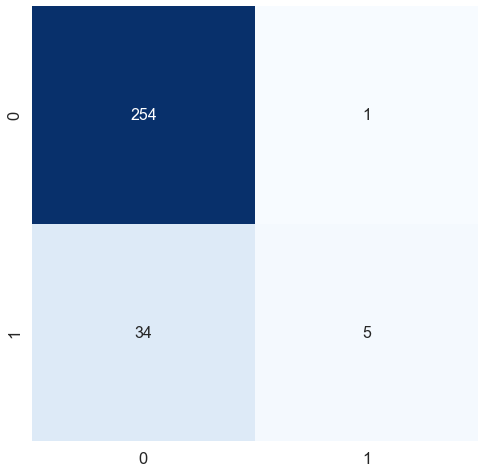

In [25]:
conf_matrix(y_test,y_pred)

In [26]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



### Naive Baye's

In [27]:
from sklearn.naive_bayes import GaussianNB 
model =  GaussianNB()


model.fit(x_train, y_train.values.ravel())

y_pred= model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
print("Prediction Accuracy: ",model.score(x_test, y_test))

Prediction Accuracy:  0.8843537414965986


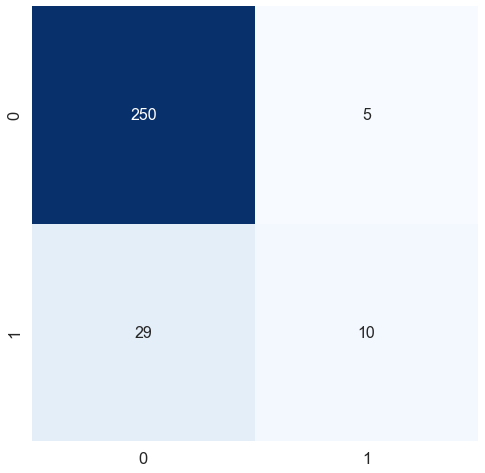

In [29]:
conf_matrix(y_test,y_pred)

In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.67      0.26      0.37        39

    accuracy                           0.88       294
   macro avg       0.78      0.62      0.65       294
weighted avg       0.87      0.88      0.86       294



### Decision Tree

In [31]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth= 2)
model = model.fit(x_train, y_train.values.ravel())
y_pred= model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [32]:
print("Prediction Accuracy: ",model.score(x_test, y_test))

Prediction Accuracy:  0.8605442176870748


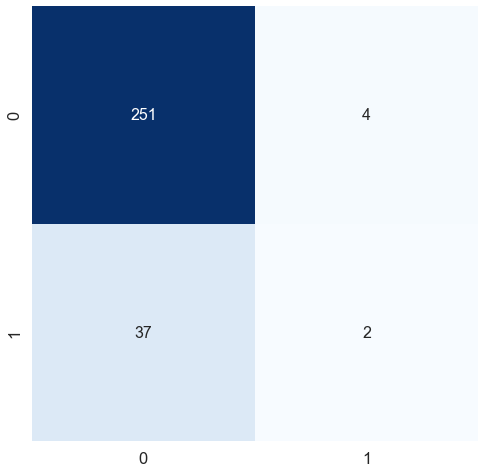

In [33]:
conf_matrix(y_test,y_pred)

In [34]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.33      0.05      0.09        39

    accuracy                           0.86       294
   macro avg       0.60      0.52      0.51       294
weighted avg       0.80      0.86      0.81       294



[Text(167.4, 181.2, 'X[2] <= 0.169\ngini = 0.28\nsamples = 1176\nvalue = [978, 198]'),
 Text(83.7, 108.72, 'X[6] <= 0.537\ngini = 0.182\nsamples = 837\nvalue = [752, 85]'),
 Text(41.85, 36.23999999999998, 'gini = 0.155\nsamples = 777\nvalue = [711, 66]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.433\nsamples = 60\nvalue = [41, 19]'),
 Text(251.10000000000002, 108.72, 'X[1] <= -0.628\ngini = 0.444\nsamples = 339\nvalue = [226, 113]'),
 Text(209.25, 36.23999999999998, 'gini = 0.431\nsamples = 54\nvalue = [17, 37]'),
 Text(292.95, 36.23999999999998, 'gini = 0.391\nsamples = 285\nvalue = [209, 76]')]

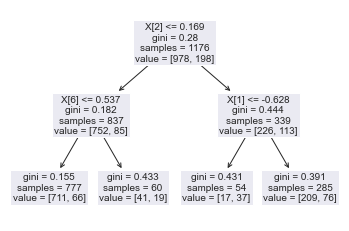

In [35]:
tree.plot_tree(model)

### Ensemble of Classifiers - Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model = model.fit(x_train, y_train.values.ravel())
y_pred= model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
print("Prediction Accuracy: ",model.score(x_test, y_test))

Prediction Accuracy:  0.8673469387755102


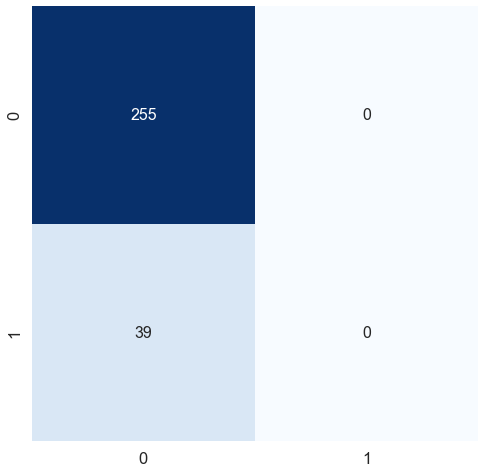

In [38]:
conf_matrix(y_test,y_pred)


In [39]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

logic_r = LogisticRegression(solver='liblinear') 
logic_r.fit(x_train, y_train.values.ravel()) 
y_pred= logic_r.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
print("Prediction Accuracy: ",logic_r.score(x_test, y_test))

Prediction Accuracy:  0.891156462585034


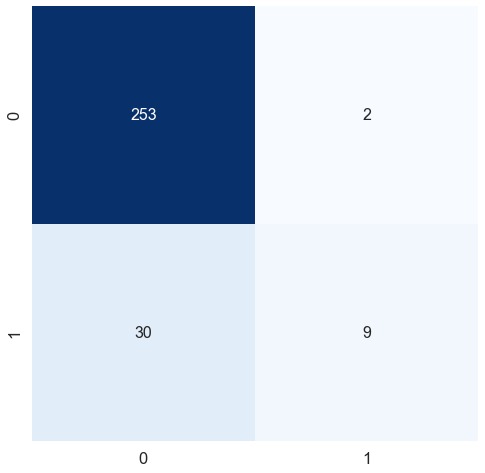

In [42]:
conf_matrix(y_test,y_pred)

In [43]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       255
           1       0.82      0.23      0.36        39

    accuracy                           0.89       294
   macro avg       0.86      0.61      0.65       294
weighted avg       0.88      0.89      0.86       294



### Conclusion

- The logistic regression is found to be the optimal classifier for this model with accuracy score of 89%.
- Different classifiers like Naive Baye's, SVM, Random forest, Decision tress, K nearest neighbour were applied and their metrics were evaluated.

### Future work

- ANN techniques can be applied to check the optimality.
- Few other Deep Learning models like SMOTE can be applied to improve the accuracy.